# Product Recommendation system

Introduction 

In [ ]:
E-commerce companies use recommendation systems to provide suggestions to the customers. 
They use item-item collaborative filtering, which scales to massive datasets and produces high quality recommendation systems in the real time. 

Objective

In [ ]:
The main goal of this project is to build a product recommendation system that predicts and suggests products a user may like, based on the similarity between items using item-item collaborative filtering.

EDA

In [1]:
#Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the file
df=pd.read_csv("rating_short.csv")
df

,userid,productid,rating,date
0,A1Z3YJF1S8Z1M3,B000M9ISQ2,5.0,1199750400
1,ALDXDYEGKB27G,B002L6HE9G,4.0,1331337600
2,A15LOGO6NBSI6B,B007MXGG5Q,5.0,1358640000
3,A23LX12CA3G4FG,B008HOEDYU,1.0,1385337600
4,A3TV7QFYXAG130,B0069R7TAM,5.0,1402963200
...,...,...,...,...
78240,A1TWH3KD5YJQHM,B0035ERKYW,5.0,1347321600
78241,AMXTPQY23TN07,B004RB8CT4,4.0,1367539200
78242,A1FCG75OIMKQCT,B002LTWDSK,2.0,1375315200
78243,A2X2NI89D5BQ2E,B004P1V8TM,5.0,1392768000


In [3]:
#Data set overview
df.shape

(78245, 4)

In [4]:
#Column names
df.columns

Index(['userid', 'productid', 'rating', 'date'], dtype='object')

In [5]:
#Viewing the top 5 rows
df.head()

,userid,productid,rating,date
0,A1Z3YJF1S8Z1M3,B000M9ISQ2,5.0,1199750400
1,ALDXDYEGKB27G,B002L6HE9G,4.0,1331337600
2,A15LOGO6NBSI6B,B007MXGG5Q,5.0,1358640000
3,A23LX12CA3G4FG,B008HOEDYU,1.0,1385337600
4,A3TV7QFYXAG130,B0069R7TAM,5.0,1402963200


In [6]:
#Viewing the bottom 5 rows
df.tail()

,userid,productid,rating,date
78240,A1TWH3KD5YJQHM,B0035ERKYW,5.0,1347321600
78241,AMXTPQY23TN07,B004RB8CT4,4.0,1367539200
78242,A1FCG75OIMKQCT,B002LTWDSK,2.0,1375315200
78243,A2X2NI89D5BQ2E,B004P1V8TM,5.0,1392768000
78244,A2VAZBUX99XIWP,B0001FTVEK,5.0,1357344000


In [7]:
#Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78245 entries, 0 to 78244
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userid     78245 non-null  object 
 1   productid  78245 non-null  object 
 2   rating     78245 non-null  float64
 3   date       78245 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 2.4+ MB


In [8]:
#Summary Statistics
df.describe()

,rating,date
count,78245.000000,7.824500e+04
mean,4.006454,1.338128e+09
std,1.385342,6.891994e+07
min,1.000000,9.320832e+08
25%,3.000000,1.315008e+09
50%,5.000000,1.360800e+09
75%,5.000000,1.386029e+09
max,5.000000,1.406074e+09


In [9]:
df.describe(include='object')

,userid,productid
count,78245,78245
unique,76430,40228
top,A3LGT6UZL99IW1,B0074BW614
freq,8,201


In [10]:
#Checking missing values
df.isna().sum()

userid       0
productid    0
rating       0
date         0
dtype: int64

In [11]:
#Datatypes
df.dtypes

userid        object
productid     object
rating       float64
date           int64
dtype: object

In [12]:
## Drop timestamp if not needed
df_new=df.drop(columns=["date"])

In [13]:
df_new

,userid,productid,rating
0,A1Z3YJF1S8Z1M3,B000M9ISQ2,5.0
1,ALDXDYEGKB27G,B002L6HE9G,4.0
2,A15LOGO6NBSI6B,B007MXGG5Q,5.0
3,A23LX12CA3G4FG,B008HOEDYU,1.0
4,A3TV7QFYXAG130,B0069R7TAM,5.0
...,...,...,...
78240,A1TWH3KD5YJQHM,B0035ERKYW,5.0
78241,AMXTPQY23TN07,B004RB8CT4,4.0
78242,A1FCG75OIMKQCT,B002LTWDSK,2.0
78243,A2X2NI89D5BQ2E,B004P1V8TM,5.0


In [14]:
#Duplicates
df.duplicated().sum()

0

In [15]:
# Count unique users and products
print("Unique Users:", df['userid'].nunique())
print("Unique Products:", df['productid'].nunique())

Unique Users: 76430
Unique Products: 40228


In [16]:
#Top Rated Products
top_products = df.groupby('productid')['rating'].mean().sort_values(ascending=False).head(10)
print(top_products)

productid
0594481813    5.0
B003XOR00I    5.0
B00CITMQIA    5.0
B003XO56EU    5.0
B003XNG6LI    5.0
B00CIUGG1M    5.0
B003XMROKG    5.0
B003XM3L0I    5.0
B003XM1WE0    5.0
B003XL8P0A    5.0
Name: rating, dtype: float64


In [17]:
#Most Active Users
top_users = df['userid'].value_counts().head(10)
print(top_users)

A3LGT6UZL99IW1    8
A1ODOGXEYECQQ8    8
ADLVFFE4VBT8      7
ARBKYIVNYWK3C     7
A27TN8D0CZ8LUY    6
AVPNQUVZWMDSX     6
A15QYHQH80W30L    6
A2AY4YUOX2N1BQ    6
A2J8T58Z4X15IO    5
A5JLAU2ARJ0BO     5
Name: userid, dtype: int64


In [27]:
df_new['rating'] = pd.to_numeric(df['rating'], errors='coerce')

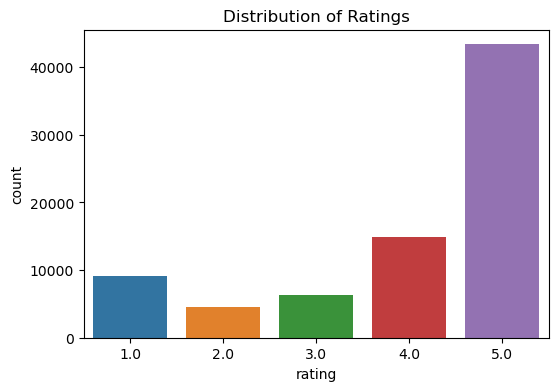

In [28]:
# Ratings distribution
plt.figure(figsize=(6,4))
sns.countplot(x='rating', data=df_new)
plt.title("Distribution of Ratings")
plt.show()

In [ ]:
#Interpretation:
Most users gave a rating of 5, which means they were very satisfied with the products.
A smaller number of users gave ratings 1 or 2, showing few negative reviews.
Overall, the ratings are skewed toward higher values, meaning most customers liked the products.

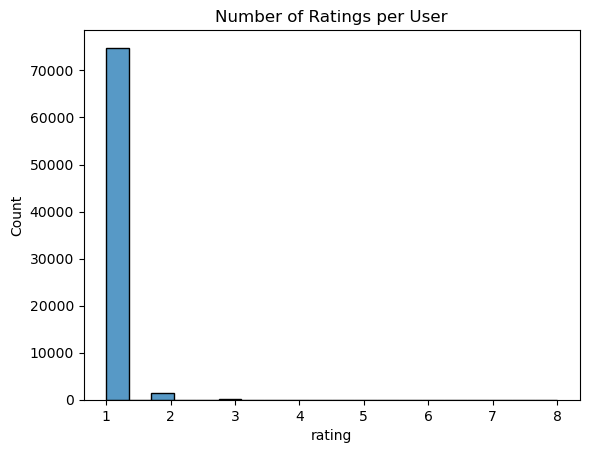

In [19]:
#Number of ratings per user
ratings_per_user = df_new.groupby('userid')['rating'].count()
sns.histplot(ratings_per_user, bins=20)
plt.title("Number of Ratings per User")
plt.show()

In [ ]:
#Interpretation:
Most users have given only one rating, meaning they rated just one product.
Very few users have rated two or more products.
This tells us that many users are less active, while only a few users rate multiple items.
So, the data is dominated by one-time users, which can make building recommendations a bit harder,because we have limited rating information per user.

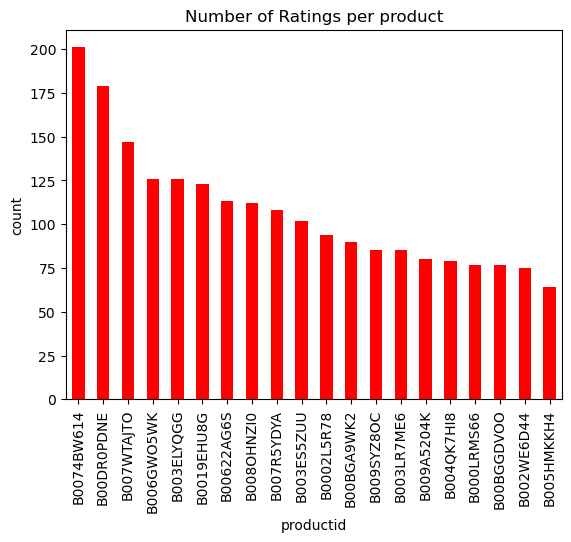

In [26]:
#Bar plot
product_counts=df['productid'].value_counts().head(20)
product_counts.plot(kind='bar',color='red')
plt.title('Number of Ratings per product')
plt.xlabel('productid')
plt.ylabel('count')
plt.show()

In [ ]:
#Interpretation:
Some products (like B0074BW614 and B00DR0PDNE) received many ratings, which means they are very popular among users.
Other products got fewer ratings, showing they are less known or less purchased.
Overall, a few products are highly rated by many users, while most have only a small number of ratings,this is a common trend in e-commerce, where popular items get most of the attention.

<Axes: >

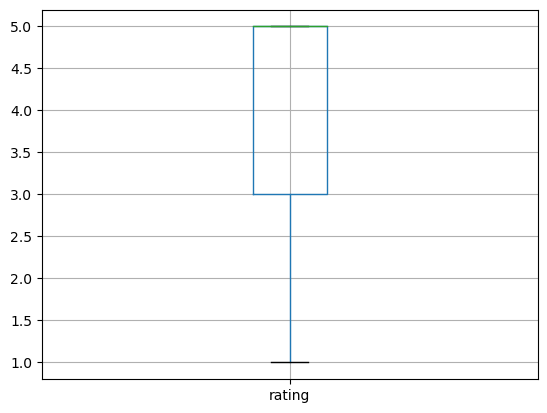

In [20]:
#Boxplot
df_new.boxplot()

In [ ]:
#Interpretation:
The ratings range from 1 to 5.
The middle 50% of the ratings (the box part) are between 3 and 5, showing that most users gave good ratings.
The median (middle line) is around 4 or 5, meaning that half of the ratings are 4 or higher.
There are no major outliers, so the data looks clean and consistent.
Overall, the products are generally well-rated by users.

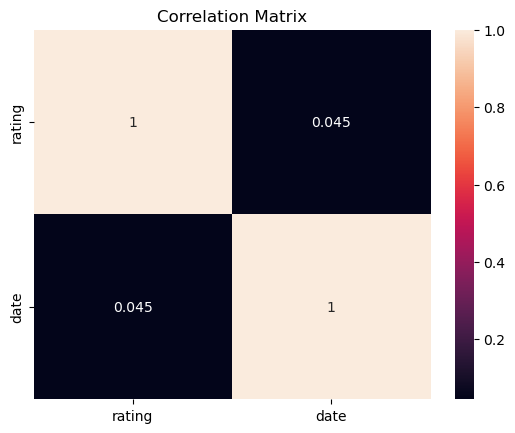

In [21]:
#CORRELATION HEATMAP
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#Interpretation:
The correlation value is 0.045, which is very close to 0.
This means there is almost no relationship between when a rating was given and how high the rating was.
In other words, ratings did not change much over time,users gave similar ratings regardless of the date.
So, time (date) does not strongly affect the rating pattern in this dataset.

Key Findings & Insights

In [ ]:
#Most users give high ratings:
The majority of ratings are 4 and 5, showing that most users are happy and satisfied with the products.
Very few users gave low ratings (1 or 2).

In [ ]:
#Most users rate only one product:
The chart shows that many users rated only one item.
Only a few users are highly active and rate multiple products.
This means the dataset has many one-time users.

In [ ]:
#Some products are much more popular
A few products (like B0074BW614 and B00DR0PDNE) received a large number of ratings, showing they are top-selling or well-known.
Many other products have very few ratings, showing uneven popularity across products.

In [ ]:
#Box Plot shows most ratings are positive
The median rating is around 4 to 5, which means that more than half of the users rated products highly.
There are no major outliers, so the ratings are consistent.

In [ ]:
#No link between date and rating
The correlation between rating and date is very small (0.045).
This means time has no effect on how users rate the products,ratings stayed steady over time.

Overall Insight

In [ ]:
The data shows a positive trend,users generally like the products.
However, since most users rate only one product,it may be harder to build strong personalized recommendations.
A few popular products dominate the dataset, which can be helpful for recommending trending or top-rated items.

EDA Summary Report

In [ ]:
The exploratory data analysis of the product rating dataset reveals several key insights.
Most users have given high ratings (4 and 5),indicating that they are generally satisfied with the products. 
The majority of users have rated only one product, suggesting that the dataset contains many one-time or less active users. 
In contrast, a few products such as B0074BW614 and B00DR0PDNE have received a large number of ratings, showing their higher popularity among customers.
The box plot shows that most ratings fall between 3 and 5, with a median close to 4 or 5, confirming the overall positive sentiment.
Additionally, the correlation analysis shows a very weak relationship between rating and date (0.045), meaning time has little or no impact on how users rate the products.
Overall, the dataset indicates strong customer satisfaction and highlights a few popular products that could be ideal for recommendation, although limited user activity might make personalized recommendations slightly challenging.

Model Building

Objective

In [ ]:
To build a product recommendation system that suggests items to users based on their previous ratings and similar user preferences.
We will use the Collaborative Filtering technique (Item–Item similarity) and also explore Clustering-based approaches for comparison.

In [29]:
#Collaborative Filtering Model
Collaborative filtering works by finding similarities between products based on how users rate them.
If two products receive similar ratings from many users, they are considered similar, and one can be recommended when the other is liked.

In [40]:
from sklearn.metrics.pairwise import cosine_similarity

In [46]:
from scipy.sparse import csr_matrix
# Create mappings for users and products
user_codes = pd.Categorical(df['userid']).codes
product_codes = pd.Categorical(df['productid']).codes

In [ ]:
#pd.Categorical(...).codes assigns a numeric index to each unique user/product.
#csr_matrix() creates a compressed sparse matrix that saves memory.
#Each cell represents a user’s rating for a product.

In [48]:
#Build sparse matrix
sparse_matrix = csr_matrix((df['rating'], (user_codes, product_codes)))

In [ ]:
#user_codes and product_codes turn IDs into numeric indices.
#csr_matrix() creates a compressed memory-efficient matrix from (data, (row, column)).
#This avoids the “negative dimensions” error from large pivot tables.

In [51]:
print("Sparse matrix created")
print("Shape:", sparse_matrix.shape)

Sparse matrix created
Shape: (76430, 40228)


In [52]:
from sklearn.metrics.pairwise import cosine_similarity
item_similarity = cosine_similarity(sparse_matrix.T)
print("Similarity matrix shape:", item_similarity.shape)

Similarity matrix shape: (40228, 40228)


In [ ]:
#imports the cosine_similarity function from scikit-learn.
#It helps us measure how similar two items (products) are based on their ratings by users.
#“Cosine similarity” checks the angle between two vectors — smaller angles mean higher similarity.
#sparse_matrix is your user–item rating matrix (users in rows, products in columns).
#.T means transpose, which swaps rows and columns (so now, products are rows, and users are columns).
#cosine_similarity() then compares every product with every other product to find how similar they are in terms of user ratings.

In [53]:
#CALCULATE ITEM-ITEM SIMILARITY
similarity = cosine_similarity(sparse_matrix.T, dense_output=False)

In [ ]:
#sparse_matrix.T
#sparse_matrix is your User–Item Matrix (Users as rows, Products as columns).
#.T means transpose — it flips rows and columns, so now:Products become rows,Users become columns
#Now,each row (product) is represented by how all users rated it.

In [54]:
#Mappings
prod_index = dict(enumerate(pd.Categorical(df['productid']).categories))
id_to_index = {v: k for k, v in prod_index.items()}

In [ ]:
#pd.Categorical(df['productid']):This converts your product IDs (which are text) into categorical values.
#Each unique product gets a unique number (code) — starting from 0, 1, 2,..
#.categories gives the list of all unique product IDs in the order they were encoded.
#enumerate() assigns each product a number (index).
#dict(enumerate(...)):Converts that list into a dictionary called prod_index.
#id_to_index = {v: k for k, v in prod_index.items()}:This creates the reverse mapping (product ID → index).


In [55]:
#Recommend function
def recommend(product_id, n=5):
    if product_id not in id_to_index:
        return []
    idx = id_to_index[product_id]
    scores = similarity[idx].toarray().ravel()
    top = scores.argsort()[-n-1:][::-1]
    return [prod_index[i] for i in top if i != idx][:n]

In [ ]:
#Check if the product exists in the dataset.
#Find its numeric index (idx) in the similarity matrix.
#Get similarity scores for that product → how close it is to all others.
#Sort scores in descending order.
#Return the top n most similar product IDs (excluding itself).

In [57]:
#Test
sample = df['productid'].iloc[0]
print("Product:",sample)
print("Recommendations:",recommend(sample))

Product: B000M9ISQ2
Recommendations: ['B0029MMY6U', 'B0029SSB3E', 'B0029SJJXA', 'B0029PQFT4', 'B0029O4I9O']


In [ ]:
#sample = df['productid'].iloc[0]:Picks the first product from your dataset.(iloc[0] means “first row”)
#print("Product:", sample):Prints the product ID you selected for testing.
#recommend(sample):Calls your recommendation function to get similar products for that sample.
#print("Recommendations:", recommend(sample)):Displays the list of top 5 similar products.

In [ ]:
#Interpretation:
The system took the product B000M9ISQ2 as the input (the product the user viewed or liked).
It found 5 other products that have similar user rating patterns — meaning, users who liked B000M9ISQ2 also tended to like these products.
So, these 5 products are the most similar or most likely to be preferred by the same users.
If a customer liked or bought B000M9ISQ2,
the system would recommend these products —
B0029MMY6U, B0029SSB3E, B0029SJJXA, B0029PQFT4, B0029O4I9O —
because they are highly similar based on past user ratings.

In [ ]:
#Clustering-Based Recommendation Model
This approach groups users into clusters based on their rating patterns using K-Means Clustering.
Users in the same cluster have similar preferences, so top-rated items from their group can be recommended.

In [58]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [60]:
#Cluster Only on Aggregated Features
# Create user-level summary features
user_summary = df.groupby('userid')['rating'].agg(['mean', 'count', 'std']).fillna(0)
# Scale and apply clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(user_summary)
kmeans = KMeans(n_clusters=3, random_state=42)
user_clusters = kmeans.fit_predict(scaled_data)
user_summary['cluster'] = user_clusters
print(user_summary.head())

                       mean  count  std  cluster
userid                                          
A000063614T1OE0BUSKUT   5.0      1  0.0        0
A0009478CBXKUCALUC7U    5.0      1  0.0        0
A00101847G3FJTWYGNQA    5.0      1  0.0        0
A00229361XSNMXZ0NHCP0   3.0      1  0.0        2
A00261423251DFHHYVST9   5.0      1  0.0        0


In [ ]:
#Interpretation:
#The model grouped users based on how they rate:
Cluster 0: Happy users who give 5-star ratings. 🌟
Cluster 2: Average users who give mid-level ratings. 😐
#These clusters help you recommend:
New or top-rated products to Cluster 0 (positive users).
Better quality or value items to Cluster 2 (neutral users).

In [61]:
#Use a Small Sample for Clustering
#Take a smaller sample (e.g., 500 users)
sample_df = df.sample(10000, random_state=42)

In [62]:
#Create user-item matrix
user_item_matrix = sample_df.pivot_table(index='userid', columns='productid', values='rating').fillna(0)

In [63]:
#Scale and cluster
scaler = StandardScaler()
scaled_data = scaler.fit_transform(user_item_matrix)

In [65]:
#Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
user_clusters = kmeans.fit_predict(scaled_data)
# Add cluster labels to users
cluster_df = pd.DataFrame({'userid': user_item_matrix.index, 'cluster': user_clusters})

In [66]:
#Merge cluster info with original sample ratings
merged = sample_df.merge(cluster_df, on='userid')

In [67]:
# Find top-rated products per cluster
top_products = merged.groupby(['cluster', 'productid'])['rating'].mean().reset_index()
recommendations = top_products.groupby('cluster').apply(lambda x: x.nlargest(5, 'rating')).reset_index(drop=True)

In [68]:
#View results
print("Clustering completed successfully!\n")
print("User Clusters:")
print(cluster_df.head())
print("\nTop 5 Recommended Products per Cluster:")
print(recommendations)

Clustering completed successfully!

User Clusters:
                  userid  cluster
0  A003734036BYKEBX7UQCZ        1
1  A004818027168B4NOA0VS        1
2   A0376615V71DIP2WFF6M        1
3  A03889472EE5BD6B5IRVB        1
4  A04141302I817U5AVAXKT        1

Top 5 Recommended Products per Cluster:
   cluster   productid  rating
0        0  B008F537KC     4.0
1        0  B00BF9MUAS     4.0
2        1  9984971805     5.0
3        1  B00000DM9W     5.0
4        1  B00000J3GR     5.0
5        1  B00000JBHE     5.0
6        1  B00000JBLJ     5.0
7        2  B008KWAV9U     2.0


In [ ]:
#Interpretation:
The K-Means model grouped users into 3 clusters (0, 1, and 2) based on their rating patterns.
In your sample, most users belong to Cluster 1, meaning they share similar preferences.
Cluster 1 users mostly give high ratings (5.0) — these are very satisfied or positive users, so products like B00000DM9W, B00000J3GR, B00000JBHE, etc., are highly recommended for them.
Cluster 0 users gave moderate ratings (4.0) — they are somewhat satisfied users, so products like B008F537KC and B00BF9MUAS are suitable for them.
Cluster 2 users gave low ratings (2.0) — these users are less satisfied, so they may need better or different product recommendations.
Cluster 1: Happy users (love top-rated products ⭐⭐⭐⭐⭐)
Cluster 0: Neutral users (give moderate ratings ⭐⭐⭐⭐)
Cluster 2: Unsatisfied users (give low ratings ⭐⭐)

Final Conclusion

In [ ]:
The project successfully developed a Product Recommendation System using user–product rating data.
Two approaches were implemented — Collaborative Filtering and Clustering-Based Recommendation.
In the Collaborative Filtering model, products were recommended based on cosine similarity, meaning users received suggestions for items that other users with similar preferences liked.
This model helps deliver personalized recommendations efficiently.
The Clustering-Based model grouped users into clusters using K-Means, based on their rating behavior.
Each cluster showed users with similar interests:
Some users consistently gave high ratings (happy customers)
Others gave average or low ratings (neutral or unsatisfied users)
Top-rated products were identified within each cluster to generate group-specific recommendations.
Overall, the system demonstrates that machine learning can effectively predict user preferences and provide smart, data-driven product suggestions.
Such models can help e-commerce platforms improve customer experience, increase engagement, and boost sales by recommending the right products to the right users.